<a href="https://colab.research.google.com/github/emanuel379/Series-Temporais-e-Aprendizado-Dinamico/blob/main/M%C3%B3dulo_1_Estat%C3%ADstica_Bayesiana_An%C3%A1lise_de_s%C3%A9ries_temporais_University_of_California%2C_Santa_Cruz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
####################################################
#####             MLE for AR(1)               ######
####################################################
phi=0.9 # ar coefficient
v=1
sd=sqrt(v) # innovation standard deviation
T=500 # number of time points
yt=arima.sim(n = T, model = list(ar = phi), sd = sd)

## Case 1: Conditional likelihood
y=as.matrix(yt[2:T]) # response
X=as.matrix(yt[1:(T-1)]) # design matrix
phi_MLE=as.numeric((t(X)%*%y)/sum(X^2)) # MLE for phi
s2=sum((y - phi_MLE*X)^2)/(length(y) - 1) # Unbiased estimate for v
v_MLE=s2*(length(y)-1)/(length(y)) # MLE for v

cat("\n MLE of conditional likelihood for phi: ", phi_MLE, "\n",
    "MLE for the variance v: ", v_MLE, "\n",
    "Estimate s2 for the variance v: ", s2, "\n")


 MLE of conditional likelihood for phi:  0.8909956 
 MLE for the variance v:  0.9567518 
 Estimate s2 for the variance v:  0.958673 


**1)** Modifique o código acima para obter uma amostra de 800 observações de um AR(1) com coeficiente AR
𝜙 = −0.8 e variância
𝑣 = 2 . Trace seus dados simulados. Obtenha o MLE para
𝜙
 com base na verossimilhança condicional e na estimativa sem viés
𝑠^2
  para a variância
𝑣.

In [26]:
####################################################
#####             MLE for AR(1)               ######
####################################################
phi= -0.8 # ar coefficient
v= 2
sd=sqrt(v) # innovation standard deviation
T= 800 # number of time points
yt=arima.sim(n = T, model = list(ar = phi), sd = sd)

## Case 1: Conditional likelihood
y=as.matrix(yt[2:T]) # response
X=as.matrix(yt[1:(T-1)]) # design matrix
phi_MLE=as.numeric((t(X)%*%y)/sum(X^2)) # MLE for phi
s2=sum((y - phi_MLE*X)^2)/(length(y) - 1) # Unbiased estimate for v
v_MLE=s2*(length(y)-1)/(length(y)) # MLE for v

cat("\n MLE of conditional likelihood for phi: ", phi_MLE, "\n",
    "MLE for the variance v: ", v_MLE, "\n",
    "Estimate s2 for the variance v: ", s2, "\n")


 MLE of conditional likelihood for phi:  -0.8090541 
 MLE for the variance v:  2.085321 
 Estimate s2 for the variance v:  2.087934 


In [ ]:
######################################################################################################################################################################

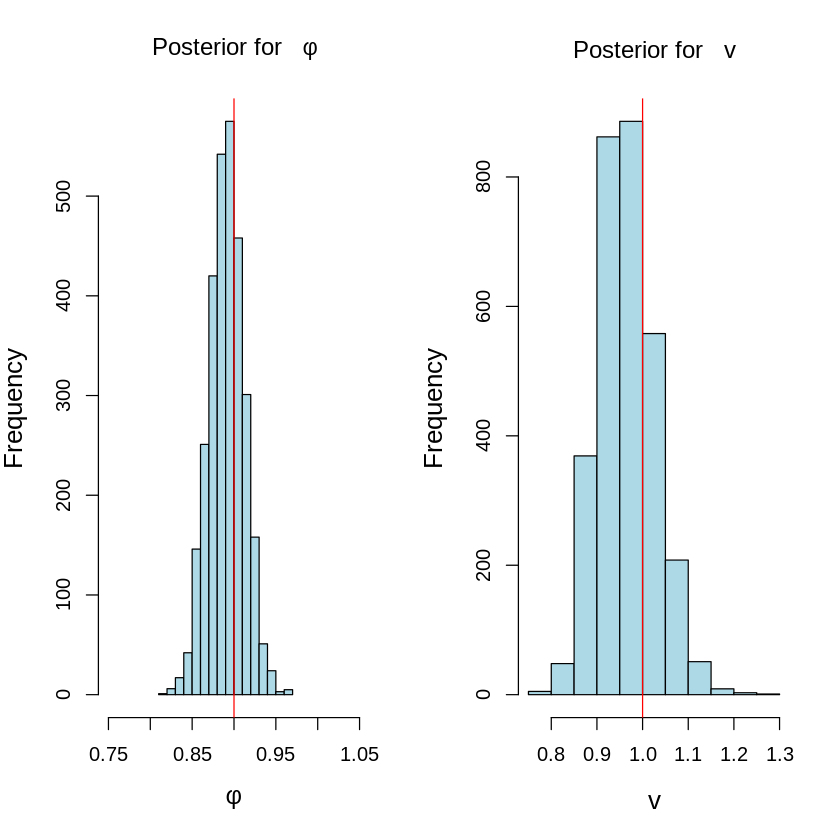

In [25]:
#######################################################
######     Posterior inference, AR(1)               ###
######     Conditional Likelihood + Reference Prior ###
######     Direct sampling                          ###
#######################################################

n_sample=3000   # posterior sample size

## step 1: sample posterior distribution of v from inverse gamma distribution
v_sample=1/rgamma(n_sample, (T-2)/2, sum((yt[2:T] - phi_MLE*yt[1:(T-1)])^2)/2)

## step 2: sample posterior distribution of phi from normal distribution
phi_sample=rep(0,n_sample)
for (i in 1:n_sample){
phi_sample[i]=rnorm(1, mean = phi_MLE, sd=sqrt(v_sample[i]/sum(yt[1:(T-1)]^2)))}

## plot histogram of posterior samples of phi and v
par(mfrow = c(1, 2), cex.lab = 1.3)
hist(phi_sample, xlab = bquote(phi),
     main = bquote("Posterior for "~phi),xlim=c(0.75,1.05), col='lightblue')
abline(v = phi, col = 'red')
hist(v_sample, xlab = bquote(v), col='lightblue', main = bquote("Posterior for "~v))
abline(v = sd, col = 'red')

**2)** Usando os dados simulados da parte 1), modifique o código acima para resumir sua inferência posterior para
𝜙 e
𝑣
 com base em 5000 amostras da distribuição posterior conjunta de
𝜙
 e
𝑣 .

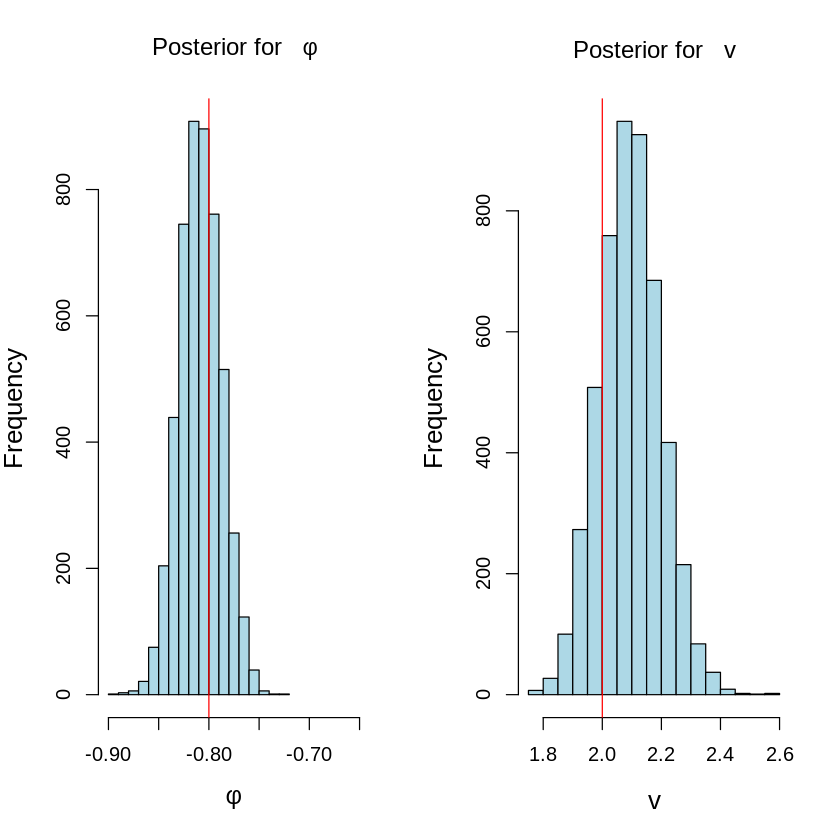

In [27]:
#######################################################
######     Posterior inference, AR(1)               ###
######     Conditional Likelihood + Reference Prior ###
######     Direct sampling                          ###
#######################################################

n_sample= 5000   # posterior sample size

## step 1: sample posterior distribution of v from inverse gamma distribution
v_sample=1/rgamma(n_sample, (T-2)/2, sum((yt[2:T] - phi_MLE*yt[1:(T-1)])^2)/2)

## step 2: sample posterior distribution of phi from normal distribution
phi_sample=rep(0,n_sample)
for (i in 1:n_sample){
phi_sample[i]=rnorm(1, mean = phi_MLE, sd=sqrt(v_sample[i]/sum(yt[1:(T-1)]^2)))}

## plot histogram of posterior samples of phi and v
par(mfrow = c(1, 2), cex.lab = 1.3)
hist(phi_sample, xlab = bquote(phi),
     main = bquote("Posterior for "~phi),xlim=c(-0.9,-0.65), col='lightblue')
abline(v = phi, col = 'red')
hist(v_sample, xlab = bquote(v), col='lightblue', main = bquote("Posterior for "~v))
abline(v = v, col = 'red')